# Metody Obliczeniowe w Nauce i Technice
## Laboratorium 12 - Równania różniczkowe i zagadnienie początkowe
### Albert Gierlach

Użyta wersja pythona:

* Python 3.8.3 64bit

Użyte biblioteki:

* numpy 1.18.2
* scipy 1.4.1
* matplotlib 3.2.1
* nodepy 0.9
* sympy 1.5 (koniecznie 1.5, 1.6 nie współpracuje z nodepy 0.9)

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false; 
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mtplt
from nodepy.runge_kutta_method import *

mtplt.rcParams['figure.figsize'] = [14, 7] # plots size

#### 1. Metoda Rungego-Kutty
##### Opisz zalety metody Rungego-Kutty w porównaniu do metody z szeregami Taylora
Metoda Rungego-Kutty w porówaniu do metody z szeregami Taylora daje znacznie dokładniejsze wyniki. Dodatkowo nie potrzebujemy znajomości pochodnych, ale w zamian musimy w każdym kroku operacji obliczać wartości funkcji kilkukrotnie. Metoda Rungego-Kutty stosuje tzz. wygładzanie, czyli oblicza średnią ważoną na podstawie wybranych punktów w obecnym przedziale iteracji - dzięki temu otrzymujemy znacznie lepszą dokładność rozwiązania.

Po zapoznaniu się z literaturą zaimplementowałem funkcję realizującą metodę Rungego-Kutty czwartego rzędu. Funkcja jest zaimplementowana na podstawie lekko zmodyfikowanego pseudokodu z książki Kincaid'a i Cheney'a. Funkcja została także wzbogacona o rysowanie wykresów oraz wyznaczanie błędu obliczeń. 

In [3]:
def rk4(x, h, a, b, f, theory_f=None):
    ys = []
    xs = np.arange(a, b+h, h)

    for t in xs:
        ys.append(x)
        k1 = h * f(t, x)
        k2 = h * f(t + (h / 2), x + (k1 / 2))
        k3 = h * f(t + (h / 2), x + (k2 / 2))
        k4 = h * f(t + h, x + k3)
        x += (k1 + (2 * k2) + (2 * k3) + k4) / 6

    if theory_f:
        plt.subplot(1, 2, 1)
    plt.plot(xs, ys)  # solved
    plt.grid()
    plt.title("Solved function")

    if theory_f:
        yy = [theory_f(x) for x in xs]
        plt.subplot(1, 2, 2)
        plt.plot(xs, yy, c="red")  # expected
        plt.title("Expected function")
        plt.grid()

    plt.show()
    print("[solved]   x({}) = {}".format(b, ys[-1]))

    if theory_f:
        print("[expected] x({}) = {}".format(b, yy[-1]))
        print("error: {}".format(np.fabs(ys[-1] - yy[-1])))
        plt.plot(xs, [np.fabs(i - j) for i, j in zip(ys, yy)])
        plt.title("Error for step={}".format(h))
        plt.grid()
        plt.show()

Mając zdefiniowaną funkcję uruchomiłem ją dla równania: \\(x^{'} = \frac{x}{t} + t\sec(\frac{x}{t})\\), \\(x(0) = 0\\), \\(t\in[0; 1]\\).

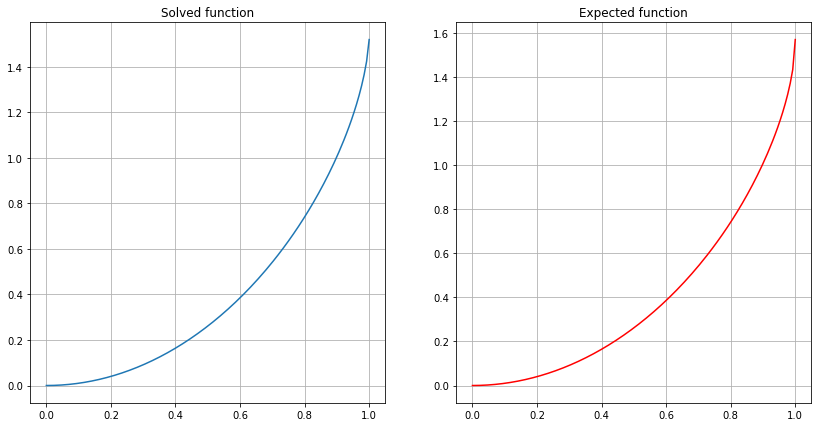

[solved]   x(1) = 1.519125120477066
[expected] x(1) = 1.5707963267948966
error: 0.05167120631783062


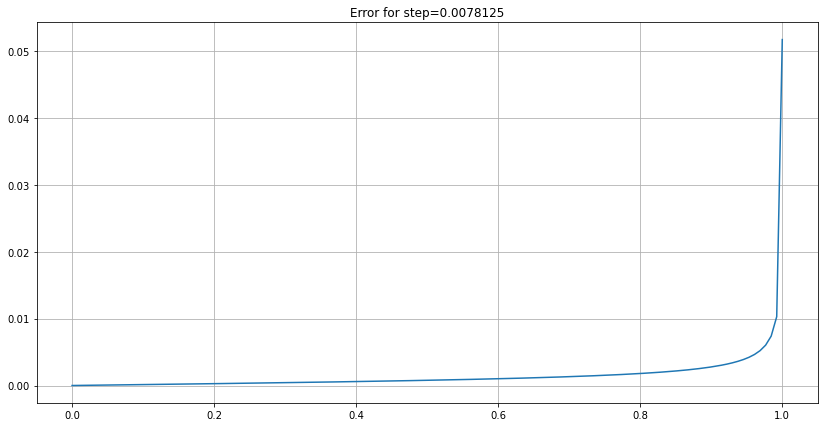

In [4]:
def f(t, x):
    if np.isclose(t, 0.0) and np.isclose(x, 0.0):
        return 0

    return (x / t) + (t * (1 / np.cos(x / t)))


a = 0
b = 1
h = 2 ** (-7)
x = 0

rk4(x, h, a, b, f, lambda x: x * np.arcsin(x))

Jak pokazują wykresy, zagadnienie zostało rozwikłane dość dokładnie, ale jak można zauważyć, błąd obliczeń narastał wraz z liczbą iteracji, a na końcu przedziału błąd bezwzględny wyniósł około 0.1, co jest dośc sporą różnicą.

Używając tej samej metody rozwiązałem zagadnienie dla równania: \\(x^{'} = 100(\sin(t) - x)\\), \\(x(0) = 0\\), \\(t\in[0; 3]\\), ale uzywając czterech różnych wartości kroków. Do wyznaczenia oczekiwanego rezultatu użyłem https://www.wolframalpha.com/

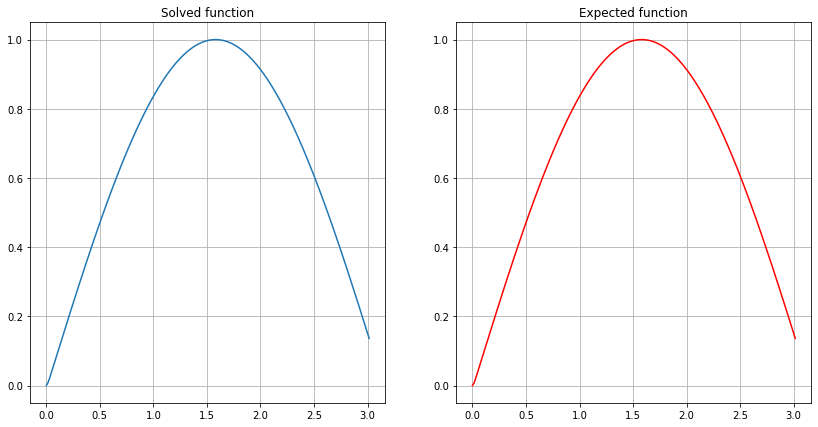

[solved]   x(3) = 0.13615952225774908
[expected] x(3) = 0.13616116410847678
error: 1.6418507277071726e-06


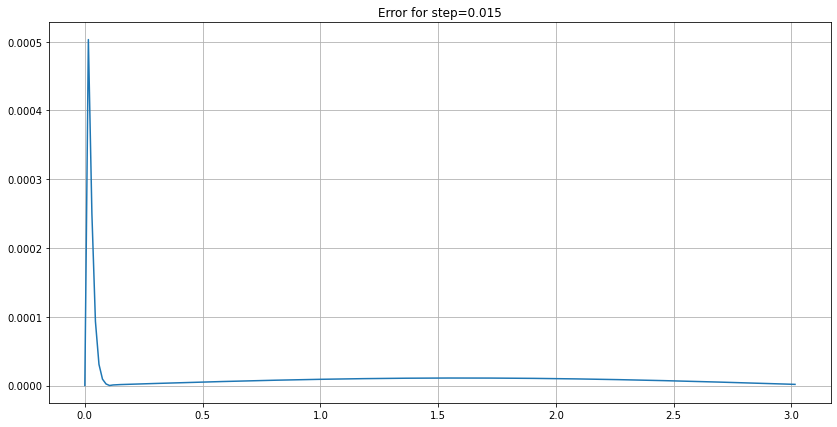

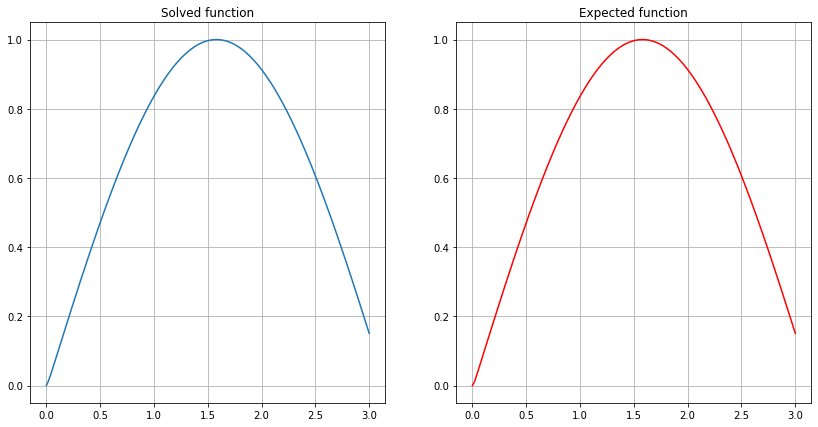

[solved]   x(3) = 0.15099613280114313
[expected] x(3) = 0.15100483254261743
error: 8.699741474299527e-06


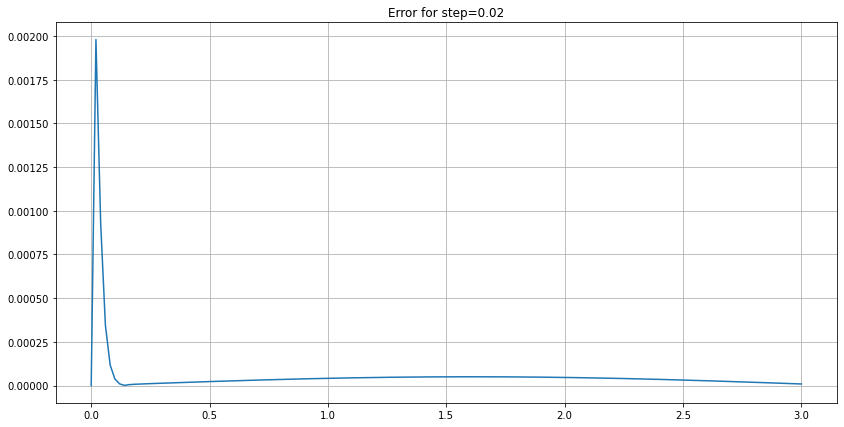

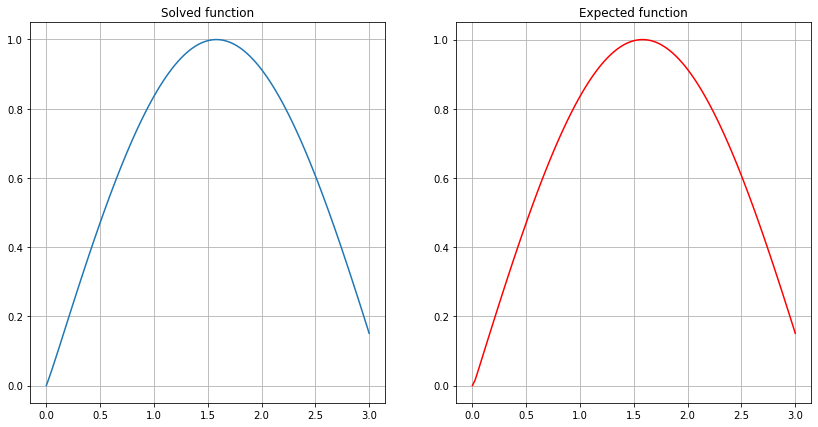

[solved]   x(3) = 0.15094316610112551
[expected] x(3) = 0.15100483254261743
error: 6.166644149191436e-05


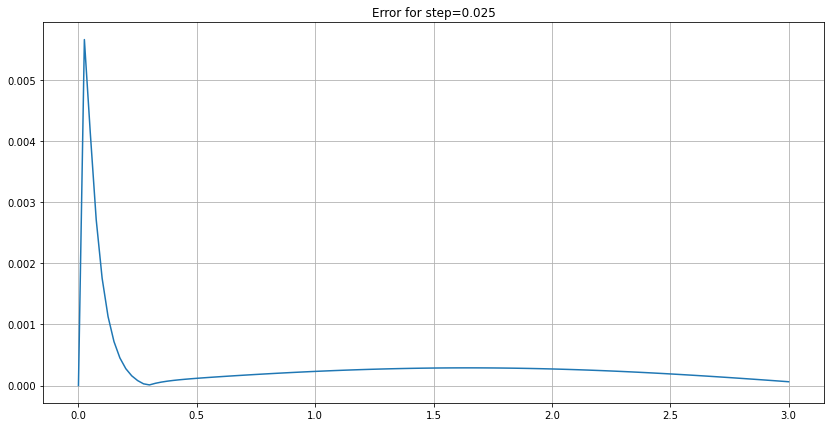

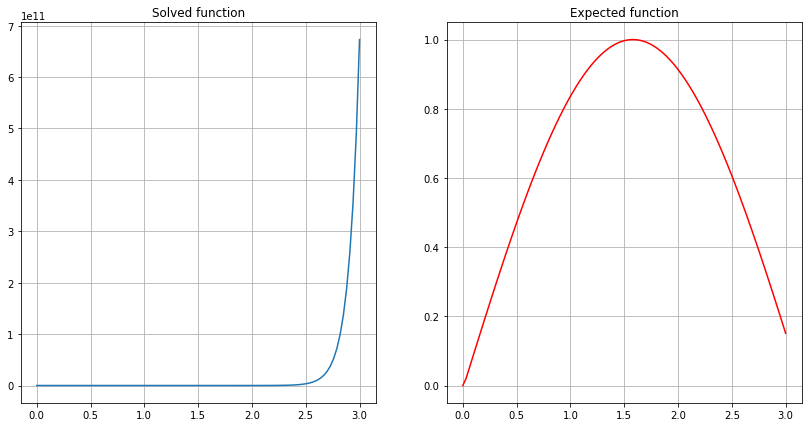

[solved]   x(3) = 672890582787.5087
[expected] x(3) = 0.15100483254261743
error: 672890582787.3577


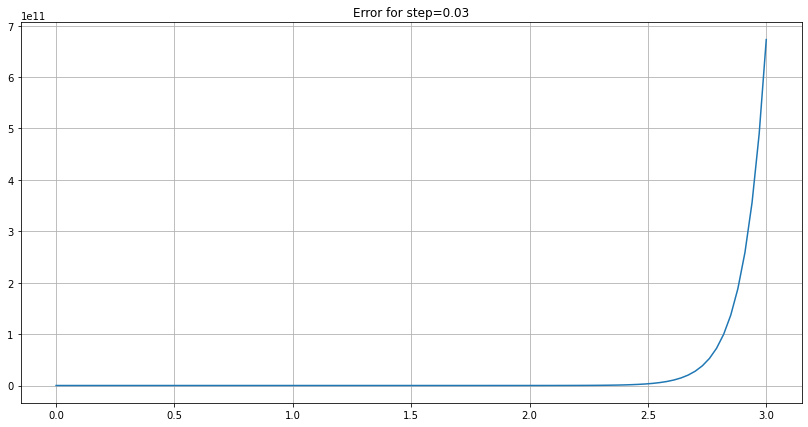

In [5]:
a = 0
b = 3
hh = [0.015, 0.02, 0.025, 0.03]
x = 0


def f(t, x):
    return 100 * (np.sin(t) - x)


def expected_f(x):
    return ((100 * np.power(np.e, -100 * x)) +
            (10000 * np.sin(x)) -
            (100 * np.cos(x))) / 10001


for h in hh:
    rk4(x, h, a, b, f, expected_f)
    print("\n\n\n\n")

Wykresy przedstawiają rozwiązania dla różnych wartości kroku. Jak widać dla kroku h=0.03 algorytm staje się niestabilny numerycznie. Wynika to z tego, że dla parametru tego równania i kroku 0.03 nie jest spełniona zależność stabilności, która przedstawia się następująco: \
Mając równanie postaci: \
$$x^{'}(t) = \lambda x(t)$$ 
określamy sobie zależność $$z = h \lambda$$ gdzie \\(\lambda\\) to współczynnik stojący przy x, a \\(h\\) to krok iteracyjny.
Mając tak określone rzeczy, korzystamy z wzoru na stabilność metody Rungego-Kutty czwartego rzędu, wygląda on następująco:
$$|1+z+\frac{1}{2}z^2 + \frac{1}{6} z^3 + \frac{1}{24} z^4|\le 1$$
W przypadku zadania:
$$x^{'} = 100(\sin(t) - x)$$
$$\lambda=-100$$
$$z = -100 h $$
Teraz wystarczy napisać prostą funkcję, która przetestuje czy algorytm ma szanse być stabilny dla danego kroku.

In [6]:
def stability_func(h, l):
    z = h * l
    return 1 + z + (1 / 2 * np.power(z, 2)) + (1 / 6 * np.power(z, 3)) + (1 / 24 * np.power(z, 4))


def test_stability(h, l):
    print("h={} 𝜆={}: stable? {}".format(h, l, "Yes" if np.fabs(stability_func(h, l)) < 1 else "No"))


for h in hh:
    test_stability(h, -100)

h=0.015 𝜆=-100: stable? Yes
h=0.02 𝜆=-100: stable? Yes
h=0.025 𝜆=-100: stable? Yes
h=0.03 𝜆=-100: stable? No


Dodatkowo za pomocą biblioteki nodepy, możemy wyrysować sobie jak wygląda obszar stabilności w dziedzinie liczb zespolonych.

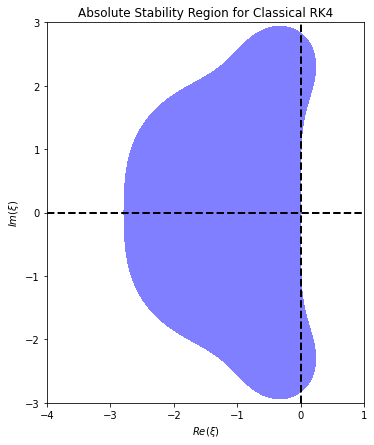

In [7]:
rk44 = loadRKM('RK44')
rk44.plot_stability_region(bounds=[-4, 1, -3, 3], alpha=0.5, color="blue")
plt.xlabel(r"$Re(\xi)$")
plt.ylabel(r"$Im(\xi)$")
plt.show()

#### 2. Adaptacyjna metoda Rungego-Kutty-Fehlberga
Po zapoznaniu się z literaturą zaimplementowałem funkcję realizującą adapcyjną metodę Rungeog-Kuttay-Fehlberga. Funkcja została także wzbogacona o rysowanie wykresów oraz wyznaczanie błędu obliczeń. Po implementacji niezbędnych funkcji rozwiązałem zadanie.

In [8]:
def rk45(f, t, x, h):
    c20, c21 = 0.25, 0.25
    c30, c31, c32 = 0.375, 0.09375, 0.28125
    c40, c41, c42, c43 = 12/13, 1932/2197, -7200/2197, 7296/2197
    c51, c52, c53, c54 = 439/216, -8, 3680/513, -845/4104
    c60, c61, c62, c63, c64, c65 = 0.5, -8/27, 2, -3544/2565, 1859/4104, -0.275
    a1, a2, a3, a4, a5 = 25/216, 0, 1408/2565, 2197/4104, -0.2
    b1, b2, b3, b4, b5, b6 = 16/135, 0, 6656/12825, 28561/56430, -0.18, 2/55

    k1 = h * f(t, x)
    k2 = h * f(t + c20 * h, x + c21 * k1)
    k3 = h * f(t + c30 * h, x + c31 * k1 + c32 * k2)
    k4 = h * f(t + c40 * h, x + c41 * k1 + c42 * k2 + c43 * k3)
    k5 = h * f(t + h, x + c51 * k1 + c52 * k2 + c53 * k3 + c54 * k4)
    k6 = h * f(t + c60 * h, x + c61 * k1 + c62 * k2 + c63 * k3 + c64 * k4 + c65 * k5)
    x5 = x + b1 * k1 + b3 * k3 + b4 * k4 + b5 * k5 + b6 * k6
    x = x + a1 * k1 + a3 * k3 + a4 * k4 + a5 * k5
    e = abs(x - x5)
    return x, e


def rk45ad(f, t, x, h, tb, emin, emax, theory_f, hmin=1.0e-3, hmax=1.0e-1, itmax=1000):
    delta = 0.5e-5
    k = 0
    iflag = 1
    ts, xs = [t], [x]

    def sign(v, s):
        if s < 0:
            return -v
        return v

    while k < itmax:
        k += 1
        if np.fabs(h) < hmin:
            h = sign(1, h) * hmin

        if np.fabs(h) > hmax:
            h = sign(1, h) * hmax

        d = np.fabs(tb - t)
        if d <= np.fabs(h):
            iflag = 0
            if d <= delta * max(np.fabs(tb), np.fabs(t)):
                break
            h = sign(1.0, h) * d

        xsave = x
        tsave = t
        x, e = rk45(f, t, x, h)
        t += h
        ts.append(t)
        xs.append(x)

        if not iflag:
            break

        if e < emin:
            h *= 2
        elif e > emax:
            h /= 2
            x = xsave
            t = tsave
            k -= 1

    plt.subplot(1, 2, 1)
    plt.plot(ts, xs)  # solved
    plt.grid()
    plt.title("Solved function")

    yy = [theory_f(x) for x in ts]
    plt.subplot(1, 2, 2)
    plt.plot(ts, yy, c="red")  # expected
    plt.title("Expected function")
    plt.grid()

    plt.show()
    print("[solved]   x({}) = {}".format(tb, xs[-1]))
    print("[expected] x({}) = {}".format(tb, theory_f(tb)))
    print("error: {}".format(np.fabs(xs[-1] - theory_f(tb))))
    plt.plot(ts, [np.fabs(i - j) for i, j in zip(xs, yy)])
    plt.title("Error")
    plt.grid()
    plt.show()

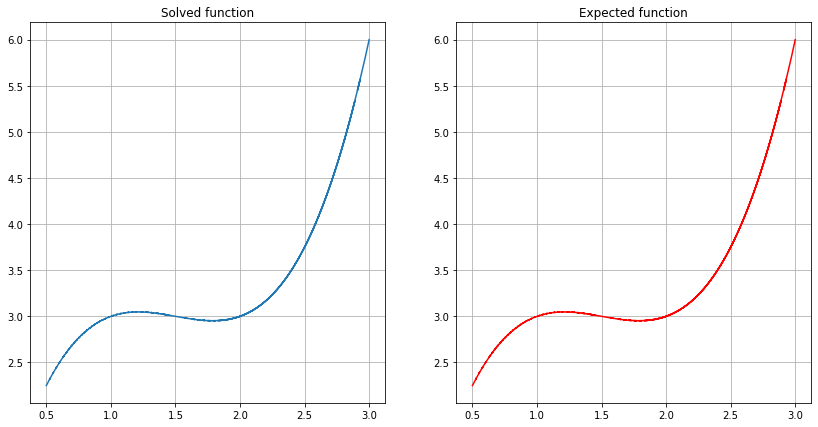

[solved]   x(0.5) = 2.250000000836467
[expected] x(0.5) = 2.25
error: 8.364668957483445e-10


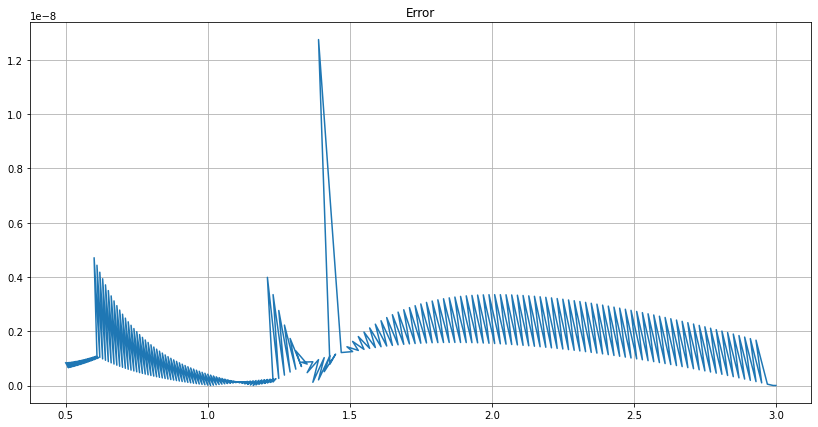

In [9]:
def f(t, x):
    return (3 * x / t) + (4.5 * t) - 13


def expected_f(x):
    return np.power(x, 3) - (4.5 * np.power(x, 2)) + (6.5 * x)


t = 3.0
x = 6.0
h = -1.0e-2
tb = 0.5
eps = 1.0e-10

rk45ad(f, t, x, h, tb, eps, eps, expected_f)

Wykres błędu ukazuje jak algorytm dostosowywuje krok iteracji w celu redukcji wielkości błędu. Użyta metoda jest bardzo dokładna, dodatkowo pozwala otrzymać wynik z określoną dokładnością. Adaptacja polega na odpowiednim regulowaniu kroku iteracji tak, by zapewnić numeryczną stabilność. Metoda jest bardziej kosztowna od metody Rungego-Kutty czwartego rzędu, gdyż wymaga więcej kalkukacji. Jeśli znamy wartość kroku, przy którym algorytm będzie stabilny to lepiej użyć metody Rungego-Kutty czwartego rzędu, jeśli nie znamy to metody adaptacyjnej.